<a href="https://colab.research.google.com/github/prateem-prakash-singh/Mini-Project/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THIS IS THE FIRST PART OF THE CODE 

---

Here we are takin 20 images each of red rose and white tulip then dividing them into training data and testing data then pridicting the output hence determining the accuracy

In [ ]:
!pip install bing-image-downloader
import bing_image_downloader
!mkdir images
from bing_image_downloader import downloader

In [ ]:
downloader.download('red rose', limit=20,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)

In [ ]:
downloader.download('white tulip', limit=20,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)

In [ ]:
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import os

target = []
images = [] 
flat_data = [] 

DATADIR = '/content/images'
CATEGORIES = ['red rose','white tulip']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(100,100,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

target = np.array(target)
images = np.array(images)
flat_data = np.array(flat_data)

In [ ]:
import pandas as pd
df = pd.DataFrame(flat_data)
df['Target'] = target
df

In [ ]:
x = df.iloc[:,0:30000].values
y = df.iloc[:,30000].values

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
z = np.arange(1,33)
param = {'n_neighbors':z}
model = KNeighborsClassifier()
model_grid = GridSearchCV(model,param)
model_grid.fit(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

PREDICTED OUTPUT

In [ ]:
i = 10
while i:
  if y_pred[10-i]==0:
    print('Red Rose')
  else:
    print('White Tulip')
  i=i-1

ACTUAL OUTPUT

In [ ]:
i = 10
while i:
  if y_test[10-i]==0:
    print('Red Rose')
  else:
    print('White Tulip')
  i=i-1

ACCURACY

In [318]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9

THIS IS THE SECOND PART OF THE CODE


---


I have added some thing extra into the project of my own ,




---


Here we are taking image as the input from the drive then converting it into the vector and then after normalisation of the vector we are passing it trough pridict then printing the answer in form of white tulip of red rose

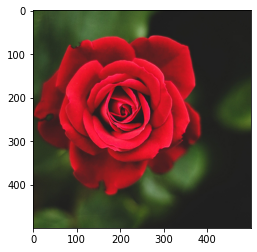

In [359]:
testimg = plt.imread('/content/drive/My Drive/MINI PROJECT/test_images/Red-Rose.jpg')
plt.imshow(testimg)

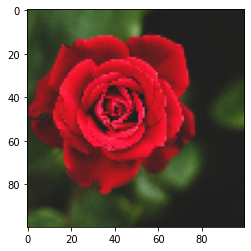

In [360]:
import cv2
a = cv2.resize(testimg,(100,100))
plt.imshow(a)

In [361]:
import numpy as np
from PIL import Image

img = a
arr = np.array(img)

# record the original shape
shape = arr.shape

# make a 1-dimensional view of arr
flat_arr = arr.ravel()

# convert it to a matrix
vector = np.matrix(flat_arr)

A = np.squeeze(np.asarray(vector))
A = A.reshape(1,-1)

In [362]:
x_train.shape

(30, 30000)

In [363]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
A = scaler.fit_transform(A)
output = model.predict(scaler.transform(vector))

In [364]:
model.predict(scaler.transform(A))

array([0])

In [365]:
if output[0]==0:
  print('Red Rose')
else:
  print('White tulip')

Red Rose
